<a href="https://colab.research.google.com/github/KAUZHAL/nisproject/blob/main/Nisproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn joblib


# DATASET

In [ ]:
import pandas as pd
data = pd.read_csv("nisdataset.csv")
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472           TCP               3   
2  SID_00003                  629           TCP               3   
3  SID_00004                  804           UDP               4   
4  SID_00005                  453           TCP               5   

   session_duration encryption_used  ip_reputation_score  failed_logins  \
0        492.983263             DES             0.606818              1   
1       1557.996461             DES             0.301569              0   
2         75.044262             DES             0.739164              2   
3        601.248835             DES             0.123267              0   
4        532.540888             AES             0.054874              1   

  browser_type  unusual_time_access  attack_detected  
0         Edge                    0                1  
1      

In [ ]:
import os
os.listdir('/content')

['.config', 'nisdataset.csv', 'sample_data']

# **Show Precision Using Graph for SVM, Decision Tree, Random Forest**


✅ Saved best model: Random Forest with Accuracy = 0.88


<ipython-input-2-d045e8ebc50b>:93: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


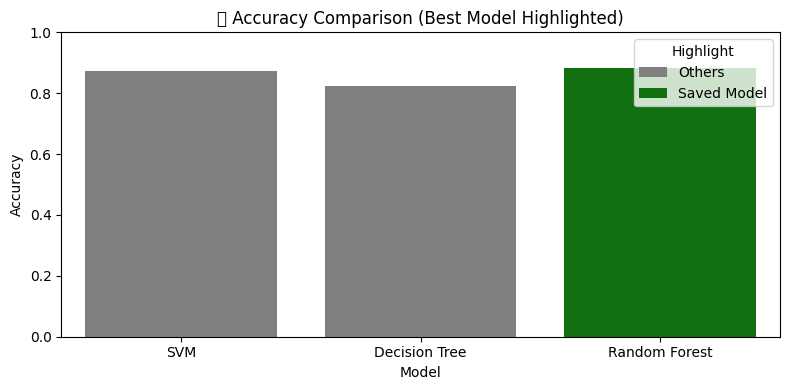

In [ ]:
#importing things that required
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler # for categorical string data , for standardizing values
from sklearn.compose import ColumnTransformer # for differentiating string from numeric data
from sklearn.pipeline import Pipeline # for saving and using the model again
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# dataset reading
data = pd.read_csv("nisdataset.csv")
data.columns = [col.strip() for col in data.columns]

#Choosing x ,y
target_column = "attack_detected"
session_ids = data['session_id']
X = data.drop([target_column, 'session_id'], axis=1)
y = data[target_column]

# training ,testing of dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)#train-test data creation
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)
#creating pipelines for each model
models = {
    "SVM": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", SVC(probability=True))
    ]),
    "Decision Tree": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier())
    ]),
    "Random Forest": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier())
    ])
}

metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []}
best_model = None
best_model_name = ""
best_accuracy = 0.0

for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
# initaliztion measueres
    metrics["Model"].append(name)
    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1"].append(f1)

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = pipeline
        best_model_name = name

joblib.dump(best_model, "fraud_detection_model.pkl") #The best model will be saved here

df_metrics = pd.DataFrame(metrics)
df_metrics["Highlight"] = df_metrics["Model"].apply(lambda x: "Saved Model" if x == best_model_name else "Others")

print(f"\nSaved best model: {best_model_name} with Accuracy = {best_accuracy:.2f}")
#plotting graph for checking accruacy for all the algorithm used
plt.figure(figsize=(8, 4))
sns.barplot(x="Model", y="Accuracy", hue="Highlight", data=df_metrics, palette={"Saved Model": "green", "Others": "grey"})
plt.title(" Accuracy Comparison (Best Model Highlighted)")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


### Detecting the fraud using input before preprocessing and cleaning


🔹 Enter Login Details 🔹
Enter login time (e.g., 13.5 for 1:30 PM): 13.5
Enter number of failed login attempts: 2
Enter IP reputation score (0-1): 0.3
Enter browser type (e.g., Chrome, Firefox): Chrome
Enter network packet size: 678
Enter protocol type (e.g., TCP, UDP): TCP
Enter total login attempts: 3
Enter session duration (in seconds): 456.67
Enter encryption used (e.g., SSL, TLS): SSL

✅ Login is Safe.
Fraud Probability: 0.10


<ipython-input-3-7e7822b78657>:82: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


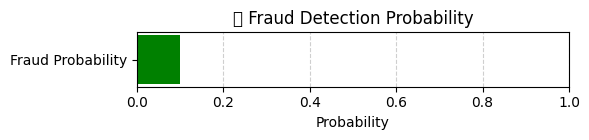

In [ ]:
import numpy as np
import pandas as pd
import joblib  # For loading the model pipeline
import matplotlib.pyplot as plt

# trained pipeline include preprocessing + model
model_pipeline = joblib.load('fraud_detection_model.pkl')

# Define function to clean, encode, and predict fraud
def predict_fraud():
    print("\n Enter Login Details ")

    # Get manual input
    login_time = float(input("Enter time: "))
    failed_logins = int(input("failed login attempts: "))
    ip_risk_score = float(input("Enter IP reputation score: "))
    browser = input("browser type: ")
    network_packet_size = int(input("network packet size: "))
    protocol_type = input("protocol type: ")
    login_attempts = int(input("total login attempts: "))
    session_duration = float(input("session duration (in seconds): "))
    encryption_used = input("Enter encryption used: ")

    # Raw dictionary
    input_data = {
        "unusual_time_access": login_time,
        "failed_logins": failed_logins,
        "ip_reputation_score": ip_risk_score,
        "browser_type": browser,
        "network_packet_size": network_packet_size,
        "protocol_type": protocol_type,
        "login_attempts": login_attempts,
        "session_duration": session_duration,
        "encryption_used": encryption_used
    }

    input_df = pd.DataFrame([input_data])

    #  Optional Cleaning (in case pipeline doesn't cover):
    # Fill missing (if user left anything blank)
    input_df.fillna({
        "unusual_time_access": input_df["unusual_time_access"].mean(),
        "failed_logins": 0,
        "ip_reputation_score": 0.5,
        "browser_type": "unknown",
        "network_packet_size": 0,
        "protocol_type": "TCP",
        "login_attempts": 1,
        "session_duration": input_df["session_duration"].mean(),
        "encryption_used": "None"
    }, inplace=True)

    #  (Optional) Handle categorical inputs - skip if pipeline handles it
    # from sklearn.preprocessing import LabelEncoder
    # label_cols = ["browser_type", "protocol_type", "encryption_used"]
    # for col in label_cols:
    #     input_df[col] = LabelEncoder().fit_transform(input_df[col])  # only if pipeline needs

    #  Predict using the pipeline
    prediction = model_pipeline.predict(input_df)
    prediction_proba = model_pipeline.predict_proba(input_df)[:, 1]

    #  Output result
    if prediction[0] == 1:
        print("\n Alert: Suspicious Login Detected!")
    else:
        print("\n Login is Safe.")

    print(f"Fraud Probability: {prediction_proba[0]:.2f}")

    #  Bar chart for fraud probability
    plt.figure(figsize=(6, 1.5))
    plt.barh(["Fraud Probability"], [prediction_proba[0]],
             color='red' if prediction[0] == 1 else 'green')
    plt.xlim(0, 1)
    plt.xlabel("Probability")
    plt.title(" Fraud Detection Probability")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Run prediction function
predict_fraud()

# **Find Null & Noise Values**

In [ ]:
import pandas as pd

# dataset
data = pd.read_csv("nisdataset.csv")

#  Strip column names of extra spaces
data.columns = [col.strip() for col in data.columns]

#  Count null values in each column
print("\n Null Value Count:")
print(data.isnull().sum())

# unique values in categorical
for col in data.select_dtypes(include='object').columns:
    print(f"\n Unique values in '{col}':")
    print(data[col].value_counts())



📊 Null Value Count:
session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

🧹 Unique values in 'session_id':
session_id
SID_09537    1
SID_09498    1
SID_09499    1
SID_09500    1
SID_09501    1
            ..
SID_00005    1
SID_00006    1
SID_00007    1
SID_00008    1
SID_00009    1
Name: count, Length: 9537, dtype: int64

🧹 Unique values in 'protocol_type':
protocol_type
TCP     6624
UDP     2406
ICMP     507
Name: count, dtype: int64

🧹 Unique values in 'encryption_used':
encryption_used
AES    4706
DES    2865
Name: count, dtype: int64

🧹 Unique values in 'browser_type':
browser_type
Chrome     5137
Firefox    1944
Edge       1469
Unknown     502
Safari      485
Name: count, dtype: int64


# **Separate Train-Test + Preprocess Properly**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#  Dataset
data = pd.read_csv("nisdataset.csv")

#  Value Handling
print("\n Null Value Count (Before Cleaning):")
print(data.isnull().sum())

# Drop rows with any null values
data_cleaned = data.dropna()

print("\n Null values removed. New shape:", data_cleaned.shape)

# Detecting Noise in Object Columns
print("\n Unique Values in Categorical Columns:")
for col in data_cleaned.select_dtypes(include='object').columns:
    print(f"\n Column: '{col}'")
    print(data_cleaned[col].value_counts())

#Encode Categorical Columns
le = LabelEncoder()
for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'object':
        data_cleaned[col] = le.fit_transform(data_cleaned[col].astype(str))

print("\n Preprocessing complete. Dataset is ready for model training.")



📊 Null Value Count (Before Cleaning):
session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

✅ Null values removed. New shape: (7571, 11)

🧹 Unique Values in Categorical Columns:

🔸 Column: 'session_id'
session_id
SID_09536    1
SID_00001    1
SID_00002    1
SID_00003    1
SID_00004    1
            ..
SID_00030    1
SID_00031    1
SID_00032    1
SID_00034    1
SID_00036    1
Name: count, Length: 7571, dtype: int64

🔸 Column: 'protocol_type'
protocol_type
TCP     5235
UDP     1941
ICMP     395
Name: count, dtype: int64

🔸 Column: 'encryption_used'
encryption_used
AES    4706
DES    2865
Name: count, dtype: int64

🔸 Column: 'browser_type'
browser_type
Chrome     4082
Firefox    1527
Edge       1183
Unknown     397
Safari   

<ipython-input-42-8edf1584d67f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col].astype(str))
<ipython-input-42-8edf1584d67f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col].astype(str))
<ipython-input-42-8edf1584d67f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

Spliting of data  

In [ ]:
from sklearn.model_selection import train_test_split

# 'data_cleaned' is the cleaned
# and 'attack_detected' is the target column

target_column = "attack_detected"
X = data_cleaned.drop(target_column, axis=1)
y = data_cleaned[target_column]

# Split into Train and Test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

print("\n Data split complete.")
print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)



✅ Data split complete.
Training Set Size: (6056, 10)
Testing Set Size: (1515, 10)


# **Testing on Clean Data**

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


data = pd.read_csv("nisdataset.csv")
data.columns = [col.strip() for col in data.columns]
if 'session_id' not in data.columns:
    data['session_id'] = [f"session_{i}" for i in range(len(data))]
data = data.dropna()

target_column = "attack_detected"
X = data.drop([target_column, 'session_id'], axis=1)
y = data[target_column]

#  Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#  Identify feature types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

#  Preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

#  Models
models = {
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

#  Store best
best_pipeline = None
best_model_name = ""
best_accuracy = 0.0

# Train & Evaluate all models
for name, clf in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"\n {name} Performance:")
    print("Accuracy :", acc)
    print("Precision:", precision)
    print("Recall   :", recall)
    print("F1 Score :", f1)

    if acc > best_accuracy:
        best_accuracy = acc
        best_pipeline = pipeline
        best_model_name = name


joblib.dump(best_pipeline, "best_fraud_pipeline.pkl")
print(f"\n Best Model: {best_model_name} (Accuracy: {best_accuracy:.2f})")
print(" Saved as: best_fraud_pipeline.pkl")



📊 SVM Performance:
Accuracy : 0.8739273927392739
Precision: 0.8848438315251682
Recall   : 0.8739273927392739
F1 Score : 0.8714397617748663

📊 Decision Tree Performance:
Accuracy : 0.8224422442244225
Precision: 0.8231593594142024
Recall   : 0.8224422442244225
F1 Score : 0.8226709617832784

📊 Random Forest Performance:
Accuracy : 0.8904290429042905
Precision: 0.9069549577422872
Recall   : 0.8904290429042905
F1 Score : 0.8877564043568968

✅ Best Model: Random Forest (Accuracy: 0.89)
🚀 Saved as: best_fraud_pipeline.pkl


# **Giving Input for Fraud Detection**


🔹 Enter Login Details 🔹
Enter login time (e.g., 13.5 for 1:30 PM): 13.5
Enter number of failed login attempts: 2
Enter IP reputation score (0-1): 0.4
Enter browser type (e.g., Chrome, Firefox): Chrome
Enter network packet size: 675
Enter protocol type (e.g., TCP, UDP): TCP
Enter total login attempts: 3
Enter session duration (in seconds): 1234.75
Enter encryption used (e.g., SSL, TLS): SSL

✅ Login is Safe.
Fraud Probability: 0.13


<ipython-input-46-838bd1a9d305>:82: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


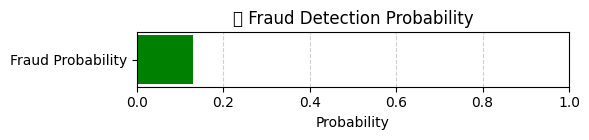

In [ ]:
import numpy as np
import pandas as pd
import joblib  # For loading the model pipeline
import matplotlib.pyplot as plt

# Load the trained pipeline (should include preprocessing + model)
model_pipeline = joblib.load('best_fraud_pipeline.pkl')

# Optional: Load column names or categories if needed (if pipeline doesn't handle)
# example: categories = joblib.load('categories.pkl')  # if you saved label mappings

# Define function to clean, encode, and predict fraud
def predict_fraud():
    print("\n🔹 Enter Login Details 🔹")

    # Get manual input
    login_time = float(input("Enter login time (e.g., 13.5 for 1:30 PM): "))
    failed_logins = int(input("Enter number of failed login attempts: "))
    ip_risk_score = float(input("Enter IP reputation score (0-1): "))
    browser = input("Enter browser type (e.g., Chrome, Firefox): ")
    network_packet_size = int(input("Enter network packet size: "))
    protocol_type = input("Enter protocol type (e.g., TCP, UDP): ")
    login_attempts = int(input("Enter total login attempts: "))
    session_duration = float(input("Enter session duration (in seconds): "))
    encryption_used = input("Enter encryption used (e.g., SSL, TLS): ")

    # Raw dictionary
    input_data = {
        "unusual_time_access": login_time,
        "failed_logins": failed_logins,
        "ip_reputation_score": ip_risk_score,
        "browser_type": browser,
        "network_packet_size": network_packet_size,
        "protocol_type": protocol_type,
        "login_attempts": login_attempts,
        "session_duration": session_duration,
        "encryption_used": encryption_used
    }

    input_df = pd.DataFrame([input_data])

    #  Optional Cleaning (in case pipeline doesn't cover):
    # Fill missing (if user left anything blank)
    input_df.fillna({
        "unusual_time_access": input_df["unusual_time_access"].mean(),
        "failed_logins": 0,
        "ip_reputation_score": 0.5,
        "browser_type": "unknown",
        "network_packet_size": 0,
        "protocol_type": "TCP",
        "login_attempts": 1,
        "session_duration": input_df["session_duration"].mean(),
        "encryption_used": "None"
    }, inplace=True)

    #  (Optional) Handle categorical inputs - skip if pipeline handles it
    # from sklearn.preprocessing import LabelEncoder
    # label_cols = ["browser_type", "protocol_type", "encryption_used"]
    # for col in label_cols:
    #     input_df[col] = LabelEncoder().fit_transform(input_df[col])  # only if pipeline needs

    #  Predict using the pipeline
    prediction = model_pipeline.predict(input_df)
    prediction_proba = model_pipeline.predict_proba(input_df)[:, 1]

    #  Output result
    if prediction[0] == 1:
        print("\n🚨 Alert: Suspicious Login Detected!")
    else:
        print("\n Login is Safe.")

    print(f"Fraud Probability: {prediction_proba[0]:.2f}")

    # Bar chart for fraud probability
    plt.figure(figsize=(6, 1.5))
    plt.barh(["Fraud Probability"], [prediction_proba[0]],
             color='red' if prediction[0] == 1 else 'green')
    plt.xlim(0, 1)
    plt.xlabel("Probability")
    plt.title("🔍 Fraud Detection Probability")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Run prediction function
predict_fraud()
